In [27]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import adversial_noise.utils
import importlib
importlib.reload(adversial_noise)
importlib.reload(adversial_noise.utils)
from adversial_noise.utils  import RemoveAlphaChannel, add_gaussian_noise, get_imagenet_classes

# Load the pre-trained model
model = models.resnet152(pretrained=True)

# model_name = 'resnet152'
# model = models.get_model(model_name,)

# Set the model to evaluation mode
model.eval()


transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    RemoveAlphaChannel(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])
])
# Load the image
image = Image.open('input_images/example_image4.jpg')

# Apply the transformations
image_tensor = transform(image).unsqueeze(0)

# Make the prediction
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

# Make predictions
with torch.no_grad():
    output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Load ImageNet classes
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

get_imagenet_classes(probabilities, 5)

/Users/yahiaelgamal/.pyenv/versions/3.10.13/envs/adversarial_noise/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yahiaelgamal/.pyenv/versions/3.10.13/envs/adversarial_noise/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'60, night_snake': tensor(0.3626),
 '62, rock_python': tensor(0.1616),
 '52, thunder_snake': tensor(0.1440),
 '66, horned_viper': tensor(0.1060),
 '68, sidewinder': tensor(0.0685)}

In [3]:
torch.rand(100)

tensor([0.7754, 0.6273, 0.2175, 0.5951, 0.6100, 0.8279, 0.7651, 0.4102, 0.8142,
        0.3099, 0.7378, 0.9410, 0.4198, 0.4575, 0.2471, 0.6610, 0.3147, 0.1876,
        0.7198, 0.2182, 0.9515, 0.7950, 0.0469, 0.5411, 0.4489, 0.6052, 0.1517,
        0.8376, 0.2037, 0.9290, 0.9621, 0.4659, 0.2846, 0.1613, 0.4826, 0.8463,
        0.8716, 0.1856, 0.7404, 0.4986, 0.2414, 0.7251, 0.2727, 0.9734, 0.0040,
        0.5109, 0.4855, 0.2142, 0.4656, 0.6477, 0.8372, 0.2719, 0.7879, 0.0852,
        0.6551, 0.4321, 0.8835, 0.1478, 0.7163, 0.9189, 0.7592, 0.7086, 0.5478,
        0.2212, 0.7095, 0.3688, 0.9570, 0.7279, 0.8408, 0.9261, 0.6688, 0.7129,
        0.3525, 0.8324, 0.5248, 0.6479, 0.7509, 0.2526, 0.8267, 0.5734, 0.6742,
        0.0414, 0.5525, 0.9918, 0.5554, 0.6852, 0.2104, 0.0148, 0.8745, 0.7436,
        0.6199, 0.9300, 0.1214, 0.9666, 0.5679, 0.8421, 0.7724, 0.7564, 0.9356,
        0.8886])

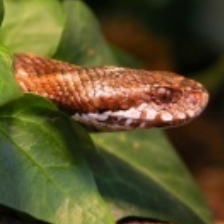

In [6]:

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    RemoveAlphaChannel(),
    # transforms.Normalize(
    #     mean=[0.485, 0.456, 0.406], 
    #     std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image)

transforms.ToPILImage()(image_tensor)

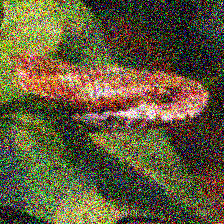

In [14]:
transforms.ToPILImage()(add_gaussian_noise(image_tensor, 0, 0.3))

In [ ]:
class AdvNoise(torch.nn.Module):
    def __init__(self, n_pixels=100):
        self.noise_tensor = torch.rand

    def forward(self, x: torch.Tensor, y: torch.Tensor):
        '''
        x is a tensor [n_pixels]
        y is a tensor of [1]
        '''
        
        